In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
import random

In [2]:

import numpy as np

import tensorflow as tf

train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='./curated_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='./curated_data',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(224, 224),
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 17104 files belonging to 3 classes.
Using 13684 files for training.
Found 17104 files belonging to 3 classes.
Using 3420 files for validation.


In [5]:
inputs = tf.keras.layers.Input(shape=(1,))
predictions = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.applications.ResNet50(weights=None,input_shape=(224,224,1),classes=3)
adam = optimizers.Adam(learning_rate = 0.003)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [6]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 1)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
initial_epochs = 10
history = model.fit(
  train_dataset,
  epochs=initial_epochs
)

Epoch 1/10
428/428 [==============================] - 154s 334ms/step - loss: 1.1451 - accuracy: 0.6244
Epoch 2/10
428/428 [==============================] - 134s 312ms/step - loss: 0.7193 - accuracy: 0.6860
Epoch 3/10
428/428 [==============================] - 136s 315ms/step - loss: 0.5478 - accuracy: 0.7783
Epoch 4/10
428/428 [==============================] - 139s 322ms/step - loss: 0.3805 - accuracy: 0.8558
Epoch 5/10
428/428 [==============================] - 134s 312ms/step - loss: 0.2578 - accuracy: 0.9043
Epoch 6/10
428/428 [==============================] - 135s 314ms/step - loss: 0.2414 - accuracy: 0.9125
Epoch 7/10
428/428 [==============================] - 135s 314ms/step - loss: 0.2281 - accuracy: 0.9140
Epoch 8/10
428/428 [==============================] - 135s 314ms/step - loss: 0.2143 - accuracy: 0.9178
Epoch 9/10
428/428 [==============================] - 135s 314ms/step - loss: 0.2124 - accuracy: 0.9200
Epoch 10/10
428/428 [==============================] - 135s 314m

In [8]:
results=model.evaluate(test_dataset)

107/107 [==============================] - 20s 173ms/step - loss: 0.2878 - accuracy: 0.8865


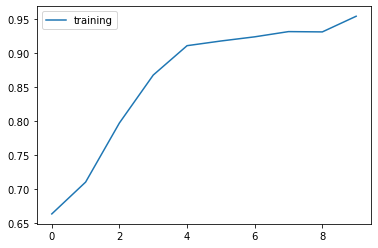

[0.8638895153999329, 0.6777997612953186, 0.4983983039855957, 0.3530087172985077, 0.24519827961921692, 0.2291167825460434, 0.19842056930065155, 0.1769765466451645, 0.1824004203081131, 0.1200907751917839]
[0.6640602350234985, 0.7108301520347595, 0.7977930307388306, 0.8681672215461731, 0.9113563299179077, 0.9182256460189819, 0.9243642091751099, 0.9320374131202698, 0.931598961353302, 0.954618513584137]


In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.legend(['training'], loc = 'upper left')
plt.show()

# 각종 값 출력
print(history.history['loss'])
print(history.history['accuracy'])

In [10]:
results

[0.2878057360649109, 0.886549711227417]